#Introduction to Time Series Data Clustering
Time series data clustering involves grouping similar sequences of data points collected over time. Unlike traditional clustering, it focuses on the similarity in patterns or trends in data across time intervals, rather than on static data characteristics. This form of clustering is essential in various fields like finance for stock price analysis, meteorology for weather pattern identification, and retail for sales trend analysis. The key challenge is the dynamic nature of time series data, which requires specialized approaches to measure similarities and differences. Techniques such as Dynamic Time Warping (DTW) or adapting traditional algorithms like K-Means to handle time-ordered data are often employed. The goal is to uncover hidden temporal patterns, identify anomalies, forecast future trends, and make more informed decisions based on the temporal behavior of the data.

In this notebook, we'll explore time series data clustering using a practical approach. We'll preprocess the data to handle any inconsistencies and apply feature scaling to ensure uniformity. The clustering process will be demonstrated using a modified version of K-Means suitable for time series data, helping us group similar temporal patterns together. This approach will enable us to reveal underlying structures and relationships in the time series data that are not immediately apparent, providing valuable insights into the dynamics of the dataset.

## Dataset Overview: City Temperature Data
The City Temperature dataset offers a comprehensive look at temperature records from multiple cities over several years. It's an ideal example of time series data, where each data point represents a temperature measurement at a specific date and time. This dataset can exhibit various temporal patterns due to factors like seasonality, geographical location, and climate changes. By clustering this time series data, we can categorize cities into groups based on similarities in their temperature profiles over time. Such analysis could be instrumental in understanding climate patterns, planning for weather-dependent activities, and studying environmental changes.

Our analysis will involve processing this dataset to extract meaningful time series information and then applying clustering techniques to discover groups of cities with similar temperature trends. Visualizations like time series plots and heatmaps will be used to illustrate the clustering results, enhancing our understanding of the similarities and differences in temperature patterns among different cities. The goal is to leverage time series clustering to gain deeper insights into the climatic behavior exhibited in the dataset, showcasing the potential of this technique in extracting meaningful information from temporal data.

### 1. Load the Dataset
This step involves loading the dataset into a pandas DataFrame, the first step in any data analysis process.

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('city_temperature.csv')
df.head()

<ipython-input-5-1a09f3501614>:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('city_temperature.csv')


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


### 2. Data Preprocessing
Preprocessing the data is essential for any analysis. This step includes handling missing values and removing invalid temperature entries.

In [6]:
# Handling missing values and removing invalid temperature entries
df.dropna(inplace=True)
df = df[df['AvgTemperature'] != -99]

### 3. Feature Engineering for Time Series
This step involves converting date information into a datetime object and setting it as the index, which is crucial for time series analysis.

In [7]:
# Converting date information and setting it as index
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.set_index('Date', inplace=True)
df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)


### 4. Feature Scaling
Scaling features ensures that they contribute equally to the analysis, which is important for algorithms like KMeans.

In [8]:
from sklearn.preprocessing import StandardScaler

# Scaling the 'AvgTemperature' feature
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['AvgTemperature']])


### 5. Clustering Time Series Data Using KMeans
This step applies the KMeans clustering algorithm to the scaled time series data, grouping data into clusters based on temperature patterns.

In [9]:
from sklearn.cluster import KMeans

# Applying KMeans clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 6. Time Series Clustering Analysis
Analyzing the clusters to understand their characteristics, such as the mean temperature of each cluster.

In [10]:
# Analyzing the clusters
cluster_analysis = df.groupby('Cluster').mean()


<ipython-input-10-ae7f6e5934c2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = df.groupby('Cluster').mean()


### 7. Generating Plots for Time Series Clustering
Visualizing the time series clustering results helps in understanding how temperature patterns vary over time in different clusters.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


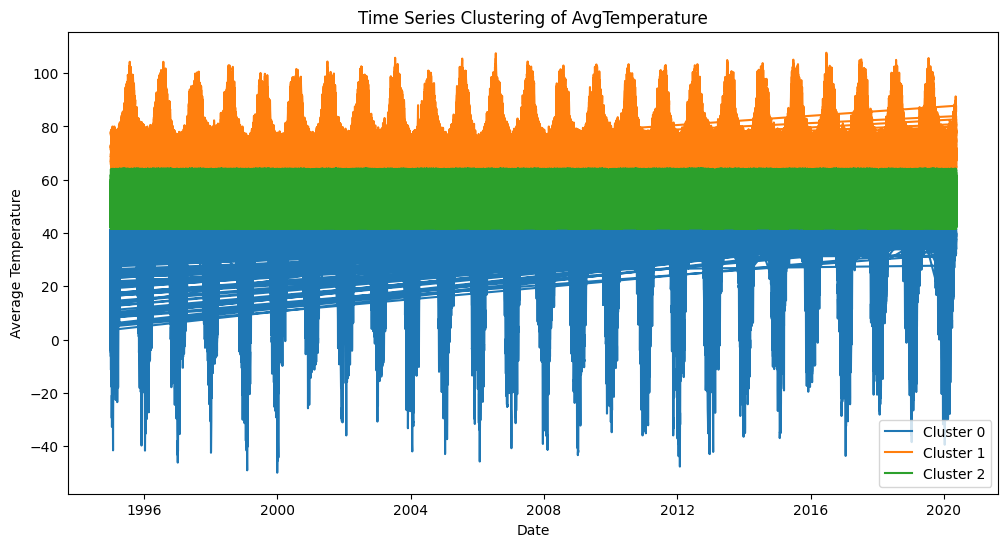

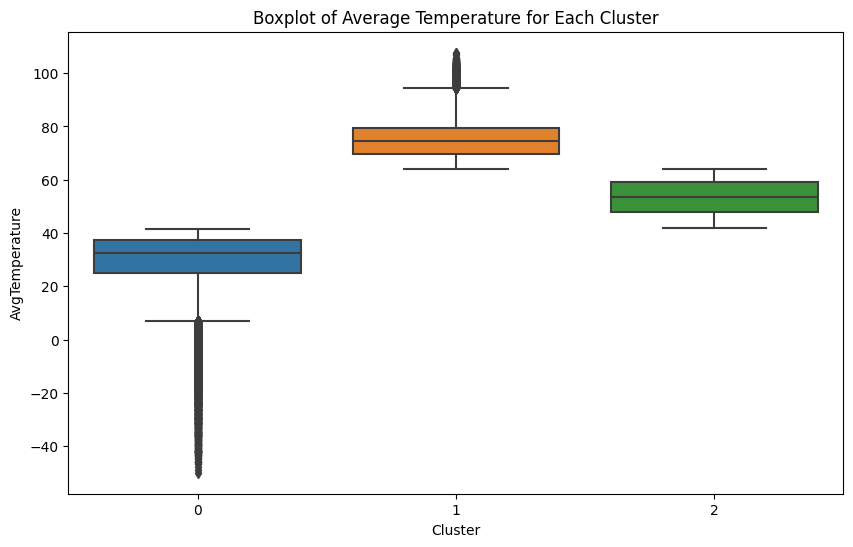

<ipython-input-13-38679e1a575c>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('Cluster').mean()


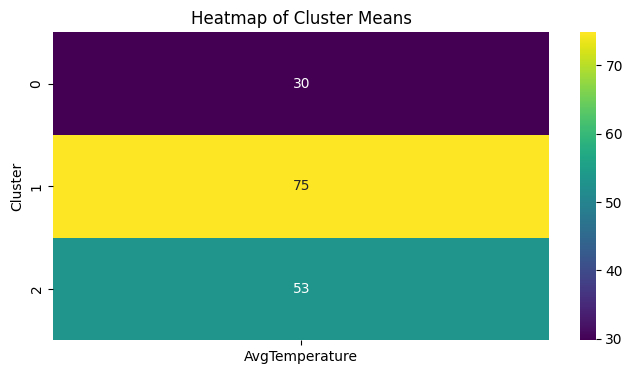

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting time series data with cluster labels
plt.figure(figsize=(12, 6))
for cluster in range(num_clusters):
    temp_data = df[df['Cluster'] == cluster]
    plt.plot(temp_data.index, temp_data['AvgTemperature'], label=f'Cluster {cluster}')
plt.title('Time Series Clustering of AvgTemperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()

print()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='AvgTemperature', data=df)
plt.title('Boxplot of Average Temperature for Each Cluster')
plt.show()

print()

# Preparing data for the heatmap
cluster_means = df.groupby('Cluster').mean()

# Creating the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means, annot=True, cmap='viridis')
plt.title('Heatmap of Cluster Means')
plt.ylabel('Cluster')
plt.show()

### 8. Displaying Cluster Analysis
The final step provides insights into the average temperatures of each cluster, helping to interpret the clustering results.

In [12]:
# Displaying the results of the cluster analysis
print(cluster_analysis)

         AvgTemperature
Cluster                
0             29.776140
1             74.840988
2             53.363637
